## Softmax

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder
from utils import plot_result
tf.random.set_seed(0)

In [2]:
digits = load_digits()
X = digits.data
X /= np.max(X)
y = digits.target
Y = OneHotEncoder().fit_transform(y.reshape(-1, 1)).toarray()
print(X.shape)
print(y.shape)
print(Y.shape)

(1797, 64)
(1797,)
(1797, 10)


In [3]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=0)

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(48, input_dim=X_train.shape[1]))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(24))
# model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(len(digits.target_names), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                3120      
                                                                 
 re_lu (ReLU)                (None, 48)                0         
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                1176      
                                                                 
 re_lu_1 (ReLU)              (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                250       
                                                                 
Total params: 4,546
Trainable params: 4,546
Non-trainabl

Epoch 1/70
45/45 [==============================] - 1s 5ms/step - loss: 2.0178 - accuracy: 0.3389 - val_loss: 1.5716 - val_accuracy: 0.6194
Epoch 2/70
45/45 [==============================] - 0s 2ms/step - loss: 1.1923 - accuracy: 0.6785 - val_loss: 0.7603 - val_accuracy: 0.8583
Epoch 3/70
45/45 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.8065 - val_loss: 0.4869 - val_accuracy: 0.8861
Epoch 4/70
45/45 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.8546 - val_loss: 0.3252 - val_accuracy: 0.9306
Epoch 5/70
45/45 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8859 - val_loss: 0.2650 - val_accuracy: 0.9361
Epoch 6/70
45/45 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.9116 - val_loss: 0.2157 - val_accuracy: 0.9472
Epoch 7/70
45/45 [==============================] - 0s 2ms/step - loss: 0.2787 - accuracy: 0.9144 - val_loss: 0.1945 - val_accuracy: 0.9444
Epoch 8/70
45/45 [==

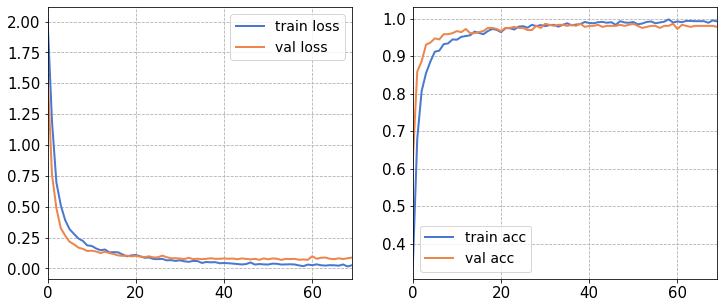

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

In [449]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=70, validation_data=(X_test, Y_test))
plot_result(history)

In [450]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
digits = load_digits()
X = digits.data
X /= np.max(X)
y = digits.target
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, np.arange(len(y)), test_size=0.2, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print('train accuracy:', accuracy_score(y_train, y_pred))
y_pred = clf.predict(X_test)
print('test accuracy:', accuracy_score(y_test, y_pred))

train accuracy: 0.9826026443980515
test accuracy: 0.9805555555555555


## CNN

In [491]:
digits = load_digits()
X = digits.data
X /= np.max(X)
y = digits.target
Y = OneHotEncoder().fit_transform(y.reshape(-1, 1)).toarray()
print(X.shape)
print(y.shape)
print(Y.shape)

(1797, 64)
(1797,)
(1797, 10)


In [492]:
X_train, X_test, Y_train, Y_test= train_test_split(X.reshape(-1, 8, 8), Y, test_size=0.2, random_state=0)
print(X_train.shape)

(1437, 8, 8)


In [493]:
x_input = tf.keras.layers.Input((8,8,1))
x = tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding='same')(x_input)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D(pool_size=2, strides=1, padding='valid')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.models.Model(x_input, x)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 8, 8, 1)]         0         
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 10)          100       
                                                                 
 batch_normalization_9 (Batc  (None, 8, 8, 10)         40        
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 7, 10)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 490)               0         
                                                                 
 dense_130 (Dense)           (None, 10)                4910

Epoch 1/70
45/45 [==============================] - 1s 8ms/step - loss: 1.5385 - accuracy: 0.5525 - val_loss: 1.7981 - val_accuracy: 0.7806
Epoch 2/70
45/45 [==============================] - 0s 4ms/step - loss: 0.4675 - accuracy: 0.8963 - val_loss: 1.4382 - val_accuracy: 0.9083
Epoch 3/70
45/45 [==============================] - 0s 4ms/step - loss: 0.2747 - accuracy: 0.9436 - val_loss: 1.1458 - val_accuracy: 0.9000
Epoch 4/70
45/45 [==============================] - 0s 4ms/step - loss: 0.2000 - accuracy: 0.9610 - val_loss: 0.8611 - val_accuracy: 0.9278
Epoch 5/70
45/45 [==============================] - 0s 4ms/step - loss: 0.1528 - accuracy: 0.9694 - val_loss: 0.6362 - val_accuracy: 0.9444
Epoch 6/70
45/45 [==============================] - 0s 4ms/step - loss: 0.1239 - accuracy: 0.9770 - val_loss: 0.4459 - val_accuracy: 0.9556
Epoch 7/70
45/45 [==============================] - 0s 4ms/step - loss: 0.1041 - accuracy: 0.9812 - val_loss: 0.3224 - val_accuracy: 0.9750
Epoch 8/70
45/45 [==

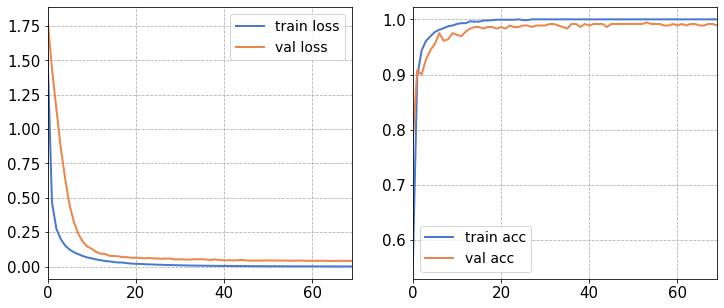

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

<Figure size 432x360 with 0 Axes>

In [494]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=70, validation_data=(X_test, Y_test))
plot_result(history)